## PyTorch의 기본 구조와 특징
Pytorch의 핵심 구성 요소와 프레임워크의 특징 설명.


In [1]:
import torch

In [2]:
# 스칼라
x = torch.tensor(5.0)
x

tensor(5.)

In [3]:
# 벡터
v = torch.tensor([1.0, 2.0, 3.0])
v

tensor([1., 2., 3.])

In [4]:
# 행렬
M = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
M

tensor([[1., 2.],
        [3., 4.]])

In [5]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])

# 덧셈
z1 = x + y
print(z1)

# 뺄셈
z2 = x - y
print(z2)

# 곱셈
z3 = x + y
print(z3)

# 나눗셈
z4 = x / y
print(z4)

tensor([5, 7, 9])
tensor([-3, -3, -3])
tensor([5, 7, 9])
tensor([0.2500, 0.4000, 0.5000])


## Tensor Manipulation 기본
PyTorch의 핵심 데이터 구조인 Tensor 조작 및 nn.Module 이해.


In [6]:
!pip install torchviz

In [7]:
from torchviz import make_dot
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [8]:
# requires_grad : gradient 정보를 알 수 있음
x = torch.tensor([1.0, 2.0, 3.0],requires_grad=True)
y = torch.tensor([4.0, 5.0, 6.0],requires_grad=True)

# 덧셈
z = x + y
print(z)

tensor([5., 7., 9.], grad_fn=<AddBackward0>)


In [9]:
z.grad_fn # x와 y로부터 z가 뽑아졌다는 것 알 수 있음.

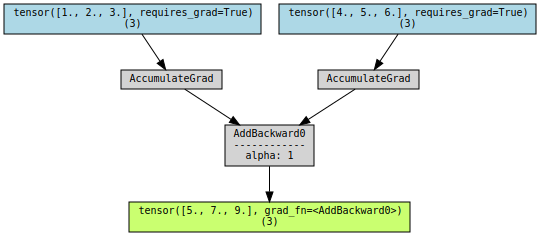

In [10]:
# Tensor들의 연관 관계 추적 가능
make_dot(z, params={x: x, y: y, z: z}, show_attrs=True, show_saved=True)

In [11]:
s = z.sum()

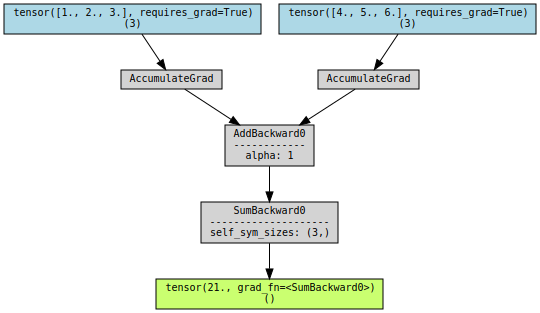

In [12]:
make_dot(s, params={x: x, y: y, z: z, s: s}, show_attrs=True, show_saved=True)

In [13]:
# Tensor의 연관 관계의 추적 과정들, gradient 정보는 backward 연산을 할 때 사용.
s.backward()

### Backward 연산은 왜 필요하지? 어떻게 역전파 계산을 할 수 있을까?

* 신경망의 **파라미터**들을 `손실 함수를 최소화하는 방향`으로 업데이트시키기 위해 필요
* 신경망의 학습 과정에서 각 가중치와 편향을 얼마나 조정해야 하는지 계산하기 위해 필요

* `경사하강법(Gradient Descent)`의 원리로 계산된다.

  * 만약 현재 지점의 기울기가 양수라면, 손실 함수가 증가하는 방향이므로 **가중치를 감소**시켜야 함
  * 만약 현재 지점의 기울기가 음수라면, 손실 함수가 감소하는 방향이므로 **가중치를 증가**시켜야 함
  * 기울기가 거의 0에 가까워지면 종료

예시1. 텐서 생성

In [14]:
# 0으로 채워진 텐서
x = torch.zeros(2, 3)
print(x)

# 1로 채워진 텐서
y = torch.ones(2, 3)
print(y)

# 특정 값을 기준으로 텐서 생성
z = torch.tensor([[1,2], [3,4]])
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1, 2],
        [3, 4]])


예시2. 텐서 타입 및 크기 확인

In [15]:
x = torch.rand(2, 3, 4)
x

tensor([[[0.2530, 0.4129, 0.3866, 0.6180],
         [0.1239, 0.5096, 0.7595, 0.1939],
         [0.6811, 0.7030, 0.8832, 0.0121]],

        [[0.9244, 0.2269, 0.8216, 0.7941],
         [0.3319, 0.9203, 0.6688, 0.1990],
         [0.5547, 0.3526, 0.2101, 0.6577]]])

In [16]:
print(x.dtype)
print(x.size())

torch.float32
torch.Size([2, 3, 4])


예시3. 텐서 변환 (reshape)

In [17]:
x = torch.rand(4, 4) # 2차원 배열
x

tensor([[0.9092, 0.1199, 0.3152, 0.5242],
        [0.0675, 0.6785, 0.3734, 0.0832],
        [0.8749, 0.5986, 0.5850, 0.5074],
        [0.9198, 0.6258, 0.8281, 0.2662]])

In [18]:
y = x.view(16) # 4 * 4 , 1차원으로 펼쳐진 배열
y

tensor([0.9092, 0.1199, 0.3152, 0.5242, 0.0675, 0.6785, 0.3734, 0.0832, 0.8749,
        0.5986, 0.5850, 0.5074, 0.9198, 0.6258, 0.8281, 0.2662])

In [19]:
x2 = torch.rand(2, 2, 2) # 3차원 배열
x2

tensor([[[0.8651, 0.2725],
         [0.0896, 0.4460]],

        [[0.9296, 0.6665],
         [0.6068, 0.3493]]])

In [20]:
y2 = x2.view(8) # 2 * 2 * 2, 1차원으로 펼쳐진 배열
y2

tensor([0.8651, 0.2725, 0.0896, 0.4460, 0.9296, 0.6665, 0.6068, 0.3493])

In [21]:
z = x.view(-1, 8) # -1은 차원을 추론하여 자동 계산한다는 의미 : 8개씩 담음
z

tensor([[0.9092, 0.1199, 0.3152, 0.5242, 0.0675, 0.6785, 0.3734, 0.0832],
        [0.8749, 0.5986, 0.5850, 0.5074, 0.9198, 0.6258, 0.8281, 0.2662]])

In [22]:
z2 = x2.view(-1, 4) # 4개씩 담음
z2

tensor([[0.8651, 0.2725, 0.0896, 0.4460],
        [0.9296, 0.6665, 0.6068, 0.3493]])

In [23]:
print(y.size())
print(z.size())
print(y2.size())
print(z2.size())

torch.Size([16])
torch.Size([2, 8])
torch.Size([8])
torch.Size([2, 4])


예시4. 텐서 연결 (concatenation)

In [24]:
a = torch.tensor([[1, 2], [3, 4]]) # 2 * 2
b = torch.tensor([[5, 6]]) # 1 * 1
d = torch.tensor([[5], [6]])
c = torch.cat([a, b], dim = 0) # dim=0은 행을 기준으로 병합 (2차원 배열에서 1차원 배열이 추가되는 방향)
z = torch.cat([a, d], dim = 1) # dim=1은 열을 기준으로 병합 (1차원 배열에서 스칼라가 추가되는 방향)
print(c)
print(z)
print(c.size())
print(z.size())

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 2, 5],
        [3, 4, 6]])
torch.Size([3, 2])
torch.Size([2, 3])


In [25]:
# torch.cat([a, b], dim=1) Error!
# torch.cat([a, d], dim=0) Error!

예시5. 차원 추가 및 제거

In [26]:
x = torch.tensor([1, 2, 3, 4]) # 벡터
x1 = x.unsqueeze(0) # 차원 추가
x2 = x1.squeeze(0) # 차원 제거
print(x1)
print(x1.size())
print(x2)
print(x2.size())

tensor([[1, 2, 3, 4]])
torch.Size([1, 4])
tensor([1, 2, 3, 4])
torch.Size([4])


예시6. 텐서 인덱싱 및 슬라이싱

In [27]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x) # 텐서 원본
print(x[0, :]) # 첫 번째 행 전체
print(x[:, 1]) # 두 번째 열 전체
print(x[1:, 1:]) # 첫 번째 행 이후의 각 행의, 첫 번째 열 이후의 각 열

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3])
tensor([2, 5, 8])
tensor([[5, 6],
        [8, 9]])


예시7. 텐서 분리 (splitting)

In [28]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
a, b = torch.split(x, 2, dim=0) # 행 기준으로, 2개씩 분리
print(x) # 텐서 원본
print(a)
print(b)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[ 7,  8,  9],
        [10, 11, 12]])


예시8. 텐서 전치 (transpose)

In [29]:
x = torch.tensor([[1, 2], [3, 4], [5, 6]])
y = x.transpose(0, 1)  # 0번째와 1번째 차원을 전치
print(x)
print(x.transpose(0, 1))
print(x.size())
print(y.size())

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 3, 5],
        [2, 4, 6]])
torch.Size([3, 2])
torch.Size([2, 3])


## nn.Module

`nn.Module`은 PyTorch의 신경망 구성을 위한 레이어 혹은 모델을 위한 클래스

아래는 nn.Linear(3, 2)의 FC(Fully Connected) 레이어 구조를 보여준다.



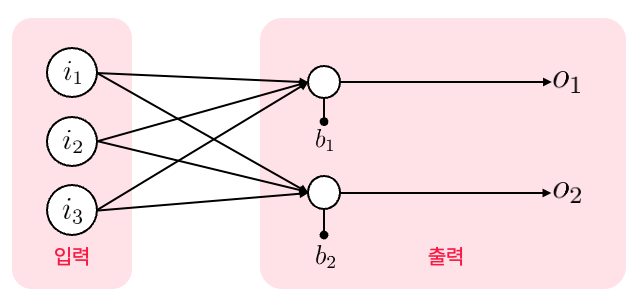

In [30]:
# nn.Module를 상속받는 클래스
class LinearModule(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__() # 부모 클래스의 초기화 메서드 호출
    self.fc = nn.Linear(input_dim, output_dim) # fc말고 다른 레이어를 쌓을 수 있음

  def forward(self, x): # 레이어에 대한 구성구조를 넣음
    return self.fc(x)

In [31]:
model = LinearModule(3, 2) # 입력 3개, 출력 2개
x = torch.randn(10, 3) # 모델의 입력 shape(3)과 x의 맨 마지막 shape(3)은 동일해야함
output = model(x)
output

tensor([[-0.1582, -0.6323],
        [ 0.0613, -0.4707],
        [ 0.7463,  0.7183],
        [-0.1813, -0.4865],
        [-0.6845, -1.2875],
        [-0.4920, -1.2686],
        [ 0.3202, -0.1286],
        [ 0.2854,  0.0697],
        [-0.0028, -0.4118],
        [-0.1708, -0.7107]], grad_fn=<AddmmBackward0>)

## 실습: XOR 예측 문제

XOR 게이트 입력 매개변수 A, B를 주었을 때 출력 Y(A⊕B)를 계산하는 모델을 학습 및 구성.

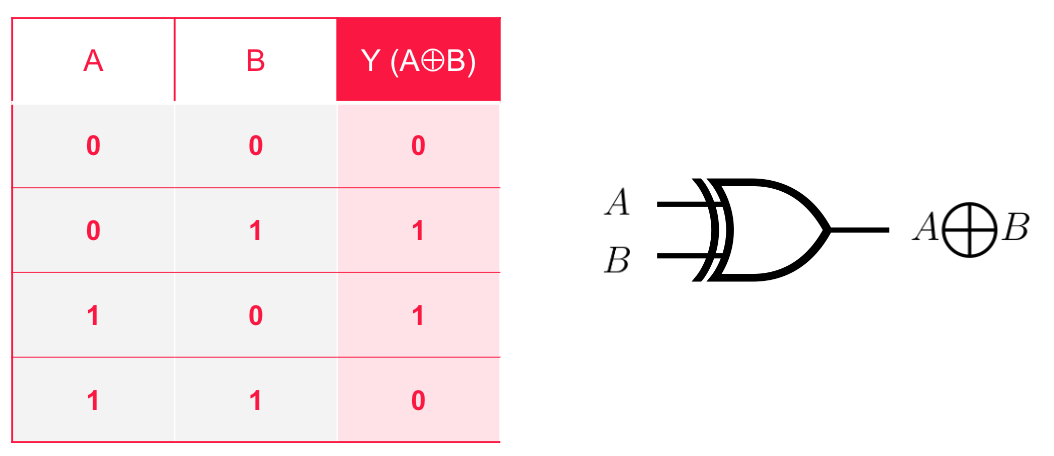

In [38]:
# XOR 연산을 위한 신경망 모델 정의
class XORModel(nn.Module):
  def __init__(self):
    super(XORModel, self).__init__()
    self.layer1 = nn.Linear(2, 2) # 입력 2개, 출력 2개
    self.layer2 = nn.Linear(2, 1) # 입력 2개, 출력 1개 / layer1의 출력 개수 = layer2의 입력 개수
    self.sigmoid = nn.Sigmoid() # Activation function(활성화 함수)

  def forward(self, x):
    x = self.sigmoid(self.layer1(x))
    x = self.sigmoid(self.layer2(x))
    return x

In [39]:
# 데이터 정의
x_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)

# 입력 데이터에 대한 정답 데이터
y_data = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# 모델 초기화
model = XORModel()

# 손실 함수 및 최적화 알고리즘 정의
criterion = nn.BCELoss() # Binary Cross-Entropy loss function
# learning mate : 얼마나 많이 가중치를 변경시키면서 학습할 것인지, 학습 강도
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [44]:
# 모델 학습
losses = []
for epoch in range(100001):
  # Forward pass
  outputs = model(x_data)
  loss = criterion(outputs, y_data) # output과 실제 정답데이터의 차이 = loss -> 계산

  # 최종 목적 : loss가 최소화되는 것
  # Backward pass and Optimization
  optimizer.zero_grad()
  loss.backward() # loss를 최소화하기위해 어떤 쪽의 파라미터, 가중치를 변경시켜야할지 계산
  optimizer.step()

  losses.append(loss.item())

  if epoch % 1000 == 0:
    print(f'Epoch [{epoch}/10000], Loss: {loss.item():.4f}')

Epoch [0/10000], Loss: 0.0311
Epoch [1000/10000], Loss: 0.0239
Epoch [2000/10000], Loss: 0.0193
Epoch [3000/10000], Loss: 0.0162
Epoch [4000/10000], Loss: 0.0139
Epoch [5000/10000], Loss: 0.0122
Epoch [6000/10000], Loss: 0.0108
Epoch [7000/10000], Loss: 0.0097
Epoch [8000/10000], Loss: 0.0089
Epoch [9000/10000], Loss: 0.0081
Epoch [10000/10000], Loss: 0.0075
Epoch [11000/10000], Loss: 0.0069
Epoch [12000/10000], Loss: 0.0065
Epoch [13000/10000], Loss: 0.0061
Epoch [14000/10000], Loss: 0.0057
Epoch [15000/10000], Loss: 0.0054
Epoch [16000/10000], Loss: 0.0051
Epoch [17000/10000], Loss: 0.0048
Epoch [18000/10000], Loss: 0.0046
Epoch [19000/10000], Loss: 0.0044
Epoch [20000/10000], Loss: 0.0042
Epoch [21000/10000], Loss: 0.0040
Epoch [22000/10000], Loss: 0.0038
Epoch [23000/10000], Loss: 0.0037
Epoch [24000/10000], Loss: 0.0036
Epoch [25000/10000], Loss: 0.0034
Epoch [26000/10000], Loss: 0.0033
Epoch [27000/10000], Loss: 0.0032
Epoch [28000/10000], Loss: 0.0031
Epoch [29000/10000], Loss: 

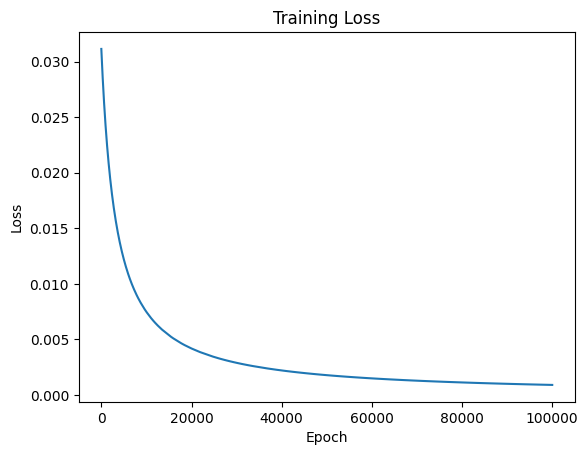

In [45]:
# Loss 시각화
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [47]:
# 모델 테스트
with torch.no_grad():
  test = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
  predicted = model(test)
  print(predicted)

# 에측값이므로 완전 0, 1로 나오지 않는다.
# 몇 이하일때는 0, 몇 이상일 때는 1로 취급하여 구분한다.
# 1.1714e-03 = 1.1714 × 10⁻³ = 1.1714×0.001=0.0011714

tensor([[1.1714e-03],
        [9.9918e-01],
        [9.9918e-01],
        [8.3594e-04]])


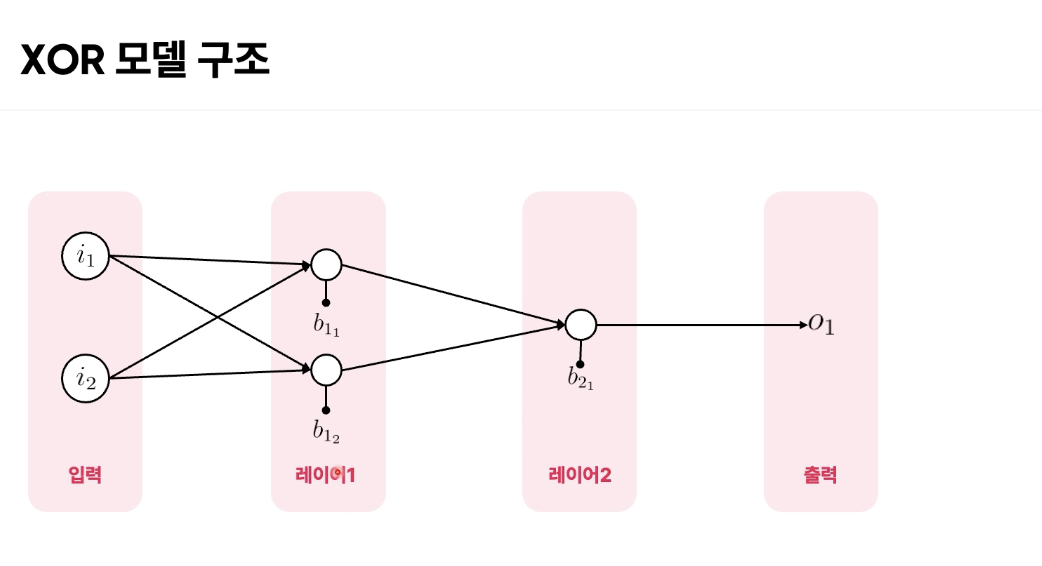

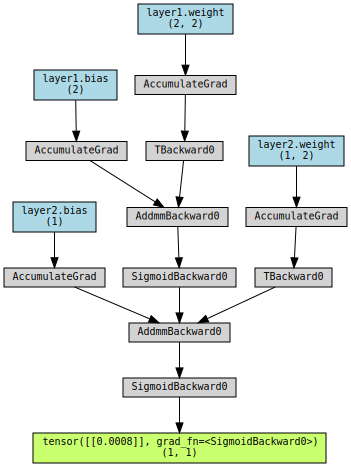

In [48]:
x = torch.randn(1, 2)
y = model(x)
make_dot(y, params={**dict(model.named_parameters()), y: y})